<a href="https://colab.research.google.com/github/itimes-digital/Bootcamp-Analista-de-Machine-Learning-IGTI/blob/master/pre_processamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import google

In [3]:
customers  = pd.read_csv('/content/Mall_Customers.csv')

In [4]:
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
# Verifica a existência de valores nulos e a soma do mesmo, neste caso, não elementos nulos.
customers.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
# Criando valores nulos no dataset
customers_null = customers
for col in customers_null.columns:
  customers_null.loc[customers_null.sample(frac=0.1).index, col] = np.nan

In [10]:
customers_null.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              160 non-null    float64
 1   Gender                  162 non-null    object 
 2   Age                     162 non-null    float64
 3   Annual Income (k$)      161 non-null    float64
 4   Spending Score (1-100)  162 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.9+ KB


In [12]:
customers_null.isnull().sum()

CustomerID                40
Gender                    38
Age                       38
Annual Income (k$)        39
Spending Score (1-100)    38
dtype: int64

In [13]:
customers_null.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,Male,19.0,15.0,NaN
1,2.0,Male,21.0,15.0,81.0
2,NaN,Female,20.0,16.0,NaN
3,4.0,Female,NaN,16.0,77.0
4,5.0,Female,31.0,17.0,40.0
5,6.0,NaN,22.0,17.0,76.0
6,7.0,NaN,35.0,18.0,6.0
7,NaN,Female,23.0,18.0,94.0
8,9.0,Male,64.0,19.0,3.0
9,10.0,Female,30.0,19.0,72.0


In [14]:
customers_null.dropna()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
1,2.0,Male,21.0,15.0,81.0
4,5.0,Female,31.0,17.0,40.0
8,9.0,Male,64.0,19.0,3.0
9,10.0,Female,30.0,19.0,72.0
13,14.0,Female,24.0,20.0,77.0
...,...,...,...,...,...
176,177.0,Male,58.0,88.0,15.0
186,187.0,Female,54.0,101.0,24.0
193,194.0,Female,38.0,113.0,91.0
194,195.0,Female,47.0,120.0,16.0


In [16]:
customers_null.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,160.000000,162.000000,161.000000,162.000000
mean,98.531250,38.098765,60.335404,50.462963
std,57.130098,13.295593,25.781278,26.003139
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,29.000000,43.000000,35.000000
50%,97.500000,35.500000,61.000000,50.000000
75%,148.500000,48.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [17]:
customers_null.fillna(customers_null.mean())

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.00000,Male,19.000000,15.000000,50.462963
1,2.00000,Male,21.000000,15.000000,81.000000
2,98.53125,Female,20.000000,16.000000,50.462963
3,4.00000,Female,38.098765,16.000000,77.000000
4,5.00000,Female,31.000000,17.000000,40.000000
...,...,...,...,...,...
195,98.53125,Female,38.098765,60.335404,79.000000
196,197.00000,Female,38.098765,126.000000,50.462963
197,198.00000,Male,32.000000,126.000000,74.000000
198,199.00000,Male,38.098765,60.335404,50.462963


In [18]:
customers_null

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,Male,19.0,15.0,NaN
1,2.0,Male,21.0,15.0,81.0
2,NaN,Female,20.0,16.0,NaN
3,4.0,Female,NaN,16.0,77.0
4,5.0,Female,31.0,17.0,40.0
...,...,...,...,...,...
195,NaN,Female,NaN,NaN,79.0
196,197.0,Female,NaN,126.0,NaN
197,198.0,Male,32.0,126.0,74.0
198,199.0,Male,NaN,NaN,NaN


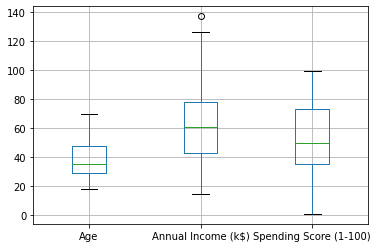

In [19]:
boxplot = customers.boxplot(column=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])

In [21]:
# Identificando ou validando se existe de fato um outlier.
from scipy import stats
z = np.abs(stats.zscore(customers['Annual Income (k$)'].values))
threshold = 2
result = np.where(z > threshold)

df_salario_outlier = customers.iloc[result[0]]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


In [22]:
df_salario_outlier

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)


Text(0.5, 1.0, 'Distribuição dos clientes quanto ao gênero')

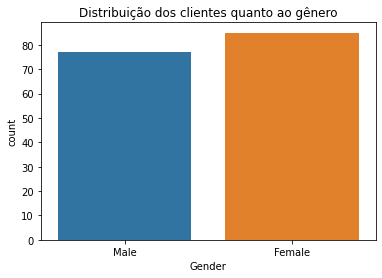

In [23]:
sns.countplot(x = 'Gender', data=customers);
plt.title('Distribuição dos clientes quanto ao gênero')

Text(0.5, 0, 'Idade')

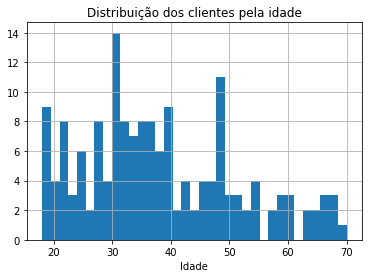

In [24]:
customers.hist('Age', bins=35)

plt.title('Distribuição dos clientes pela idade')
plt.xlabel('Idade')

In [26]:
# seleciona apenas colunas por um determinado tipo de dado, no caso, é object
cat_df_customers = customers.select_dtypes(include=['object'])

In [27]:
cat_df_customers.head()

,Gender
0,Male
1,Male
2,Female
3,Female
4,Female


In [29]:
replace_map = {'Gender': {'Male': 1, 'Female': 2}}
labels = cat_df_customers['Gender'].astype('category').cat.categories.tolist()
replace_map_comp = {'Gender': {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_map_comp)

{'Gender': {'Female': 1, 'Male': 2}}


In [32]:
cat_df_customers_replace = pd.read_csv('/content/Mall_Customers.csv')

In [34]:
cat_df_customers_replace.replace(replace_map_comp, inplace = True)
cat_df_customers_replace.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,2,19,15,39
1,2,2,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [38]:
cat_df_customers_replace.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [39]:
cat_df_customers_replace.dtypes

CustomerID                int64
Gender                    int64
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

In [35]:
customers = pd.read_csv('/content/Mall_Customers.csv')

In [36]:
cat_df_customers_lc = customers

In [37]:
cat_df_customers_lc['Gender'] = pd.Categorical(cat_df_customers_lc['Gender'])
cat_df_customers_lc.dtypes

CustomerID                   int64
Gender                    category
Age                          int64
Annual Income (k$)           int64
Spending Score (1-100)       int64
dtype: object

In [40]:
cat_df_customers_lc['Gender'] = cat_df_customers_lc['Gender'].cat.codes
cat_df_customers_lc.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [42]:
# Mesmo procedimento aplicado acima, agora com scikilearn
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()

In [43]:
customers_label = pd.read_csv('/content/Mall_Customers.csv')
customers_label['Gender'] = labelEncoder.fit_transform(customers_label['Gender'])
customers_label.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
5,6,0,22,17,76
6,7,0,35,18,6
7,8,0,23,18,94
8,9,1,64,19,3
9,10,0,30,19,72


In [45]:
# One Hot Encoder - Variáveis Dummies
customers_one_hot = pd.read_csv('/content/Mall_Customers.csv')
customers_one_hot = pd.get_dummies(customers_one_hot)
customers_one_hot.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


In [47]:
customers = pd.read_csv('/content/Mall_Customers.csv')

In [49]:
customers_one_hot = customers

from sklearn.preprocessing import OneHotEncoder

oneHotEncoder = OneHotEncoder()

In [51]:
customer_ohe = oneHotEncoder.fit_transform(customers_one_hot['Gender'].values.reshape(-1, 1)).toarray()
customer_ohe.shape

(200, 2)

In [67]:
# Columa com valores de Masculino
customer_ohe[0, 1]

1.0

In [66]:
# Columa com valores de Feminino
customer_ohe[2, 0]

1.0